In [1]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('cardekho_dataset.csv')
data.drop(['Unnamed: 0','car_name'],axis=1,inplace=True)
#Because car name is not important we can get that from brand and model only  
data

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   seller_type        15411 non-null  object 
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [5]:
categorical_columns=[]
for column in data.columns:
    if data[column].dtype=='object':
        print(column,data[column].unique())
        categorical_columns.append(column)
categorical_columns

brand ['Maruti' 'Hyundai' 'Ford' 'Renault' 'Mini' 'Mercedes-Benz' 'Toyota'
 'Volkswagen' 'Honda' 'Mahindra' 'Datsun' 'Tata' 'Kia' 'BMW' 'Audi'
 'Land Rover' 'Jaguar' 'MG' 'Isuzu' 'Porsche' 'Skoda' 'Volvo' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Nissan' 'ISUZU' 'Ferrari' 'Mercedes-AMG'
 'Rolls-Royce' 'Force']
model ['Alto' 'Grand' 'i20' 'Ecosport' 'Wagon R' 'i10' 'Venue' 'Swift' 'Verna'
 'Duster' 'Cooper' 'Ciaz' 'C-Class' 'Innova' 'Baleno' 'Swift Dzire'
 'Vento' 'Creta' 'City' 'Bolero' 'Fortuner' 'KWID' 'Amaze' 'Santro'
 'XUV500' 'KUV100' 'Ignis' 'RediGO' 'Scorpio' 'Marazzo' 'Aspire' 'Figo'
 'Vitara' 'Tiago' 'Polo' 'Seltos' 'Celerio' 'GO' '5' 'CR-V' 'Endeavour'
 'KUV' 'Jazz' '3' 'A4' 'Tigor' 'Ertiga' 'Safari' 'Thar' 'Hexa' 'Rover'
 'Eeco' 'A6' 'E-Class' 'Q7' 'Z4' '6' 'XF' 'X5' 'Hector' 'Civic' 'D-Max'
 'Cayenne' 'X1' 'Rapid' 'Freestyle' 'Superb' 'Nexon' 'XUV300' 'Dzire VXI'
 'S90' 'WR-V' 'XL6' 'Triber' 'ES' 'Wrangler' 'Camry' 'Elantra' 'Yaris'
 'GL-Class' '7' 'S-Presso' 'Dzire LXI' 'Aura'

['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [6]:
data['transmission_type']=data['transmission_type'].map({'Manual':0,'Automatic':1})
encoded_data=pd.get_dummies(data,columns=['seller_type','fuel_type'],drop_first=True)
features=[column for column in encoded_data.columns if column not in data.columns]
categorical_columns.remove('transmission_type')
categorical_columns.remove('seller_type')
categorical_columns.remove('fuel_type')
print(features,categorical_columns)

['seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol'] ['brand', 'model']


In [7]:
encoded_data[features]=encoded_data[features].astype(int)
data=encoded_data
data

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,Maruti,Alto,9,120000,0,19.70,796,46.30,5,120000,1,0,0,0,0,1
1,Hyundai,Grand,5,20000,0,18.90,1197,82.00,5,550000,1,0,0,0,0,1
2,Hyundai,i20,11,60000,0,17.00,1197,80.00,5,215000,1,0,0,0,0,1
3,Maruti,Alto,9,37000,0,20.92,998,67.10,5,226000,1,0,0,0,0,1
4,Ford,Ecosport,6,30000,0,22.77,1498,98.59,5,570000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,0,19.81,1086,68.05,5,250000,0,0,0,0,0,1
15407,Maruti,Ertiga,2,18000,0,17.50,1373,91.10,7,925000,0,0,0,0,0,1
15408,Skoda,Rapid,6,67000,0,21.14,1498,103.52,5,425000,0,0,1,0,0,0
15409,Mahindra,XUV500,5,3800000,0,16.00,2179,140.00,7,1225000,0,0,1,0,0,0


### As there are large number of unique values in the columns we have to use categpry encoders to convert them into numerical data

In [8]:
X=data.drop(['selling_price'],axis=1)
y=data[['selling_price']]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
11210,Volvo,XC60,7,70252,1,11.20,2400,215.00,5,0,0,1,0,0,0
1347,Tata,Tiago,2,10000,0,23.84,1199,84.00,5,1,0,0,0,0,1
10363,Mercedes-Benz,CLS,2,6000,1,19.00,1950,241.30,5,0,0,1,0,0,0
316,Honda,City,7,63000,0,17.80,1497,117.30,5,0,0,0,0,0,1
10638,Hyundai,i10,10,80292,0,20.36,1197,78.90,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,Maruti,Ertiga,7,127731,0,20.77,1248,88.80,7,0,0,1,0,0,0
13418,Volkswagen,Vento,11,59000,0,16.09,1598,103.20,5,0,0,0,0,0,1
5390,Maruti,Wagon R,7,20000,0,20.51,998,67.04,5,1,0,0,0,0,1
860,Hyundai,i20,2,15000,0,18.60,1197,81.86,5,0,0,0,0,0,1


In [10]:
scaler=StandardScaler()
import category_encoders as ce 

In [11]:
encoder=ce.TargetEncoder(cols=categorical_columns)
encoder

TargetEncoder(cols=['brand', 'model'])

In [12]:
X_train=encoder.fit_transform(X_train,y_train)
X_test=encoder.transform(X_test)
X_train

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
11210,1.885928e+06,9.313561e+05,7,70252,1,11.20,2400,215.00,5,0,0,1,0,0,0
1347,6.894559e+05,4.564984e+05,2,10000,0,23.84,1199,84.00,5,1,0,0,0,0,1
10363,2.436875e+06,1.383303e+06,2,6000,1,19.00,1950,241.30,5,0,0,1,0,0,0
316,6.186158e+05,6.221306e+05,7,63000,0,17.80,1497,117.30,5,0,0,0,0,0,1
10638,5.758663e+05,2.787530e+05,10,80292,0,20.36,1197,78.90,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,4.883819e+05,7.227842e+05,7,127731,0,20.77,1248,88.80,7,0,0,1,0,0,0
13418,5.231365e+05,5.327225e+05,11,59000,0,16.09,1598,103.20,5,0,0,0,0,0,1
5390,4.883819e+05,3.062496e+05,7,20000,0,20.51,998,67.04,5,1,0,0,0,0,1
860,5.758663e+05,5.471371e+05,2,15000,0,18.60,1197,81.86,5,0,0,0,0,0,1


In [13]:
X_test

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
3334,575866.252588,278753.012048,12,73000,0,20.36,1197,78.90,5,0,0,0,0,0,1
10928,488381.877023,645927.152318,4,58000,0,27.39,1248,74.00,5,1,0,1,0,0,0
2518,488381.877023,722784.172662,7,96000,0,20.77,1248,88.76,7,0,0,1,0,0,0
11322,618615.776081,622130.578512,1,4500,1,18.40,1498,119.35,5,0,0,0,0,0,1
9394,488381.877023,247483.200000,11,62000,0,19.70,796,46.30,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,523136.460554,516550.359714,9,38000,0,22.07,1199,73.90,5,0,0,1,0,0,0
10471,618615.776081,516390.681005,2,8000,1,18.10,1199,88.70,5,0,0,0,0,0,1
13098,618615.776081,516390.681005,2,2200,1,18.10,1199,88.70,5,0,0,0,0,0,1
6545,488381.877023,306249.560633,3,30000,0,20.51,998,67.04,5,1,0,0,0,0,1


In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [15]:
def prediction_model_cv(model):
    model=model(cv=5)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for the {model} is {r2_score(y_test,y_test)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test)
    

In [16]:
def prediction_model(model):
    model=model()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for the {model} is {r2_score(y_test,y_test)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test)

In [17]:
model_cv=[RidgeCV,LassoCV]
model=[SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor]

The r2 score for the RidgeCV(cv=5) is 1.0


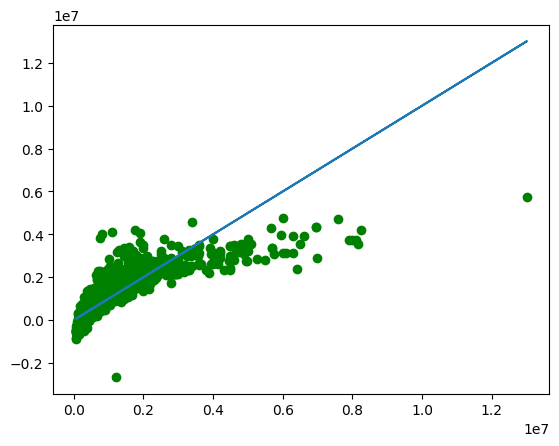

In [18]:
prediction_model_cv(RidgeCV)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The r2 score for the LassoCV(cv=5) is 1.0


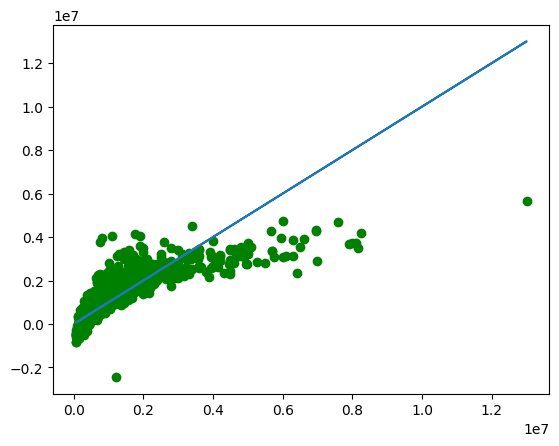

In [19]:
prediction_model_cv(LassoCV)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The r2 score for the SVR() is 1.0


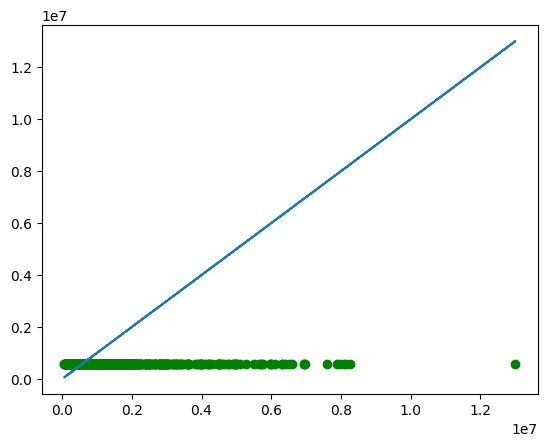

In [20]:
prediction_model(SVR)

The r2 score for the KNeighborsRegressor() is 1.0


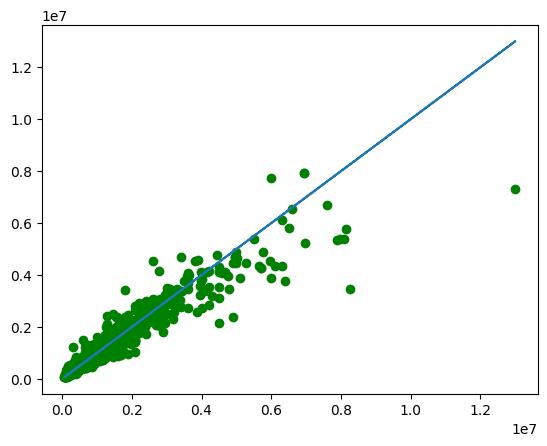

In [21]:
prediction_model(KNeighborsRegressor)

The r2 score for the DecisionTreeRegressor() is 1.0


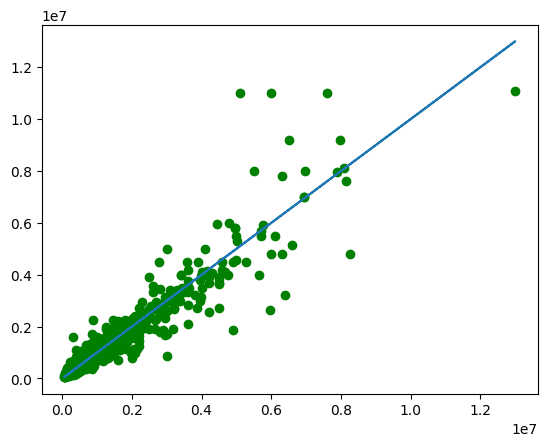

In [22]:
prediction_model(DecisionTreeRegressor)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The r2 score for the RandomForestRegressor() is 1.0


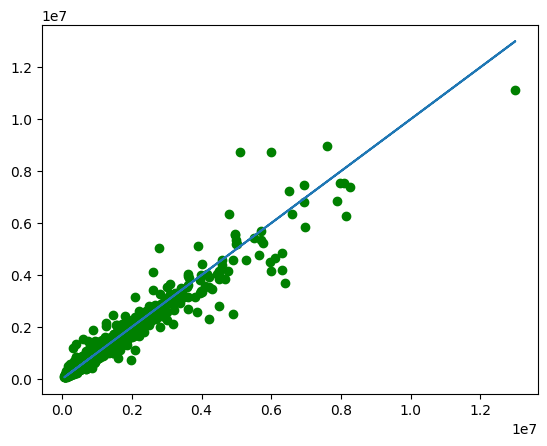

In [23]:
prediction_model(RandomForestRegressor)